In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [5]:
X = data[['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
y = data['price']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.2 ,random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = regressor.predict(X_test)
y_pred

array([ 359622.74661447, 1434019.46294519,  380146.93500396, ...,
        292185.23511423,  139244.69629275,  363972.11056735])

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.rint(y_test),np.rint(y_pred))

In [12]:
# plt.plot(X_test['sqft_living'] , y_test)
# plt.plot(X_test['sqft_living'] , y_pred)
# plt.show()

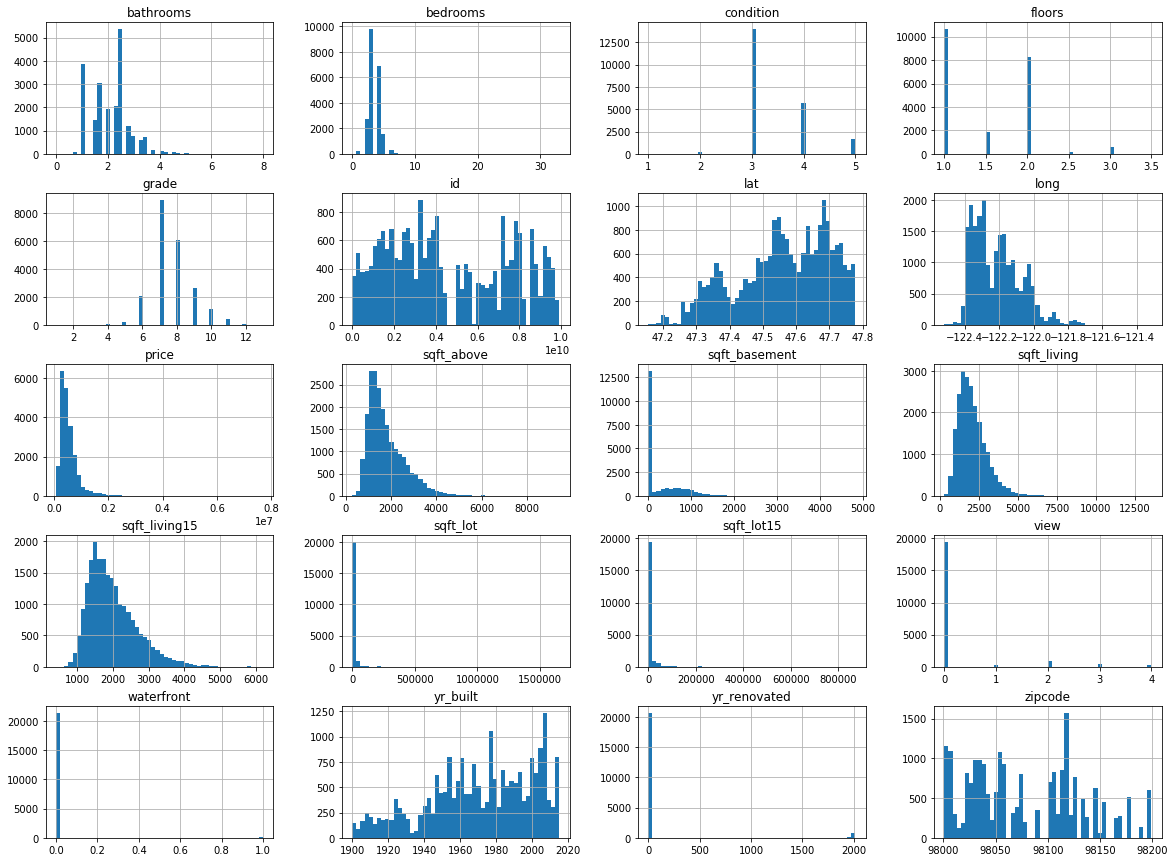

In [13]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

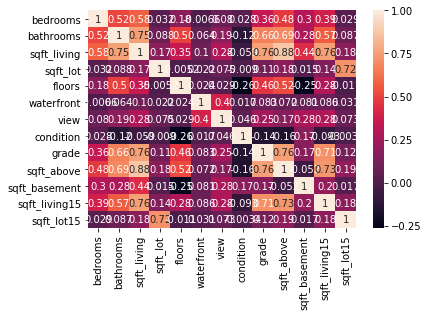

In [14]:
import seaborn as sns
sns.heatmap(X.corr(),square=False , annot=True)

In [15]:
regressor.coef_

array([-3.36599493e+04, -1.56028758e+04,  1.36518579e+02,  4.21698538e-02,
       -1.02681175e+03,  6.09127547e+05,  6.00156195e+04,  5.46885367e+04,
        9.77485848e+04,  5.42284703e+01,  8.22901093e+01,  1.26698885e+01,
       -7.87548263e-01])

In [16]:
regressor.intercept_

-684534.6570550172

In [17]:
X.columns

Index([u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot', u'floors',
       u'waterfront', u'view', u'condition', u'grade', u'sqft_above',
       u'sqft_basement', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [18]:
test = [[3,2,2000,10000,2,1,0,4,8,2000,900,3000,10000]]
y_output_temp = 0
for i in range(0,13):
    y_output_temp = y_output_temp + regressor.coef_[i] * test[0][i]
y_output = y_output_temp + regressor.intercept_
y_output

1277207.5713018407

In [19]:
from sklearn import metrics

In [20]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

219457.87446601436

In [21]:
X = np.append(arr = np.ones((21613,1),dtype = int),values=X,axis=1)

In [22]:
X.shape

(21613, 14)

In [23]:
import statsmodels.formula.api as sm

In [24]:
X_opt = X[:,[0, 1, 2, 3, 4, 5, 6,7 ,8 ,9 ,10 ,11 ,12, 13]]
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2781.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:37:35   Log-Likelihood:            -2.9751e+05
No. Observations:               21613   AIC:                         5.950e+05
Df Residuals:                   21600   BIC:                         5.952e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.897e+05   1.74e+04    -39.668      0.000   -7.24e+05   -6.56e+05
x1         -3.464e+04   2155.773    -16.068      0.000   -3.89e+04   -3.04e+04
x2         -1.485e+04   3479.741     -4.267      0.000   -2.17e+04   -8028.122
x3           133.9896      2.547     52.601      0.000     128.997     138.983
x4             0.0270      0.055      0.495      0.621      -0.080       0.134
x5         -3000.1039   3982.925     -0.753      0.451   -1.08e+04    4806.723
x6          5.857e+05   1.98e+04     29.551      0.000    5.47e+05    6.25e+05
x7          5.981e+04   2398.651     24.937      0.000    5.51e+04    6.45e+04
x8          5.381e+04   2528.411     21.282      0.000    4.89e+04    5.88e+04
x9          1.008e+05   2365.550     42.613      0.000    9.62e+04    1.05e+05
x10           52.2177      2.509     20.808      0.000      47.299      57.136
x11           81.7719      2.925     27.957      0.000      76.039      87.505
x12           11.0791      3.823      2.898      0.004       3.586      18.572
x13           -0.7497      0.083     -8.994      0.000      -0.913      -0.586
==============================================================================
Omnibus:                    15701.272   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           947595.612
Skew:                           2.907   Prob(JB):                         0.00
Kurtosis:                      34.913   Cond. No.                     2.31e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
X_opt = X[:,[0, 1, 2, 3, 5, 6,7 ,8 ,9 ,10 ,11 ,12, 13]]
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3034.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:37:35   Log-Likelihood:            -2.9751e+05
No. Observations:               21613   AIC:                         5.950e+05
Df Residuals:                   21601   BIC:                         5.951e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.896e+05   1.74e+04    -39.666      0.000   -7.24e+05   -6.56e+05
x1         -3.466e+04   2155.145    -16.084      0.000   -3.89e+04   -3.04e+04
x2         -1.484e+04   3479.666     -4.266      0.000   -2.17e+04   -8023.339
x3           134.0517      2.544     52.690      0.000     129.065     139.038
x4         -3077.6270   3979.770     -0.773      0.439   -1.09e+04    4723.016
x5          5.855e+05   1.98e+04     29.547      0.000    5.47e+05    6.24e+05
x6          5.985e+04   2397.393     24.965      0.000    5.52e+04    6.46e+04
x7           5.38e+04   2528.281     21.279      0.000    4.88e+04    5.88e+04
x8          1.008e+05   2365.508     42.614      0.000    9.62e+04    1.05e+05
x9            52.3105      2.502     20.904      0.000      47.406      57.215
x10           81.7411      2.924     27.953      0.000      76.009      87.473
x11           10.9789      3.817      2.876      0.004       3.497      18.461
x12           -0.7208      0.059    -12.133      0.000      -0.837      -0.604
==============================================================================
Omnibus:                    15697.060   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           946452.223
Skew:                           2.906   Prob(JB):                         0.00
Kurtosis:                      34.894   Cond. No.                     1.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
X_opt = X[:,[0, 1, 2, 3, 6,7 ,8 ,9 ,10 ,11 ,12, 13]]
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3337.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:37:35   Log-Likelihood:            -2.9751e+05
No. Observations:               21613   AIC:                         5.950e+05
Df Residuals:                   21602   BIC:                         5.951e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.917e+05   1.72e+04    -40.303      0.000   -7.25e+05   -6.58e+05
x1         -3.459e+04   2152.745    -16.066      0.000   -3.88e+04   -3.04e+04
x2         -1.578e+04   3261.813     -4.838      0.000   -2.22e+04   -9387.450
x3           134.3306      2.518     53.339      0.000     129.394     139.267
x4          5.855e+05   1.98e+04     29.544      0.000    5.47e+05    6.24e+05
x5          5.982e+04   2396.947     24.956      0.000    5.51e+04    6.45e+04
x6          5.407e+04   2503.338     21.600      0.000    4.92e+04     5.9e+04
x7          1.005e+05   2335.464     43.038      0.000    9.59e+04    1.05e+05
x8            51.6322      2.344     22.031      0.000      47.039      56.226
x9            82.6984      2.649     31.215      0.000      77.506      87.891
x10           11.4088      3.776      3.021      0.003       4.007      18.811
x11           -0.7163      0.059    -12.116      0.000      -0.832      -0.600
==============================================================================
Omnibus:                    15719.317   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           951214.729
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                      34.974   Cond. No.                     1.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
X_train_OLS , X_test_OLS , y_train_OLS, y_test_OLS = train_test_split(X_opt[:,1:] , y , test_size= 0.2 ,random_state = 0)

In [28]:
regressor_after_OLS = LinearRegression()
regressor_after_OLS.fit(X_train_OLS,y_train_OLS)
y_pred_OLS = regressor_after_OLS.predict(X_test_OLS)

In [31]:
print('Train score: ',regressor.score(X_train,y_train))
print('Test score: ',regressor.score(X_test,y_test))

('Train score: ', 0.6093533572247429)
('Test score: ', 0.5950216137548459)


In [30]:
print('Train score: ',regressor_after_OLS.score(X_train_OLS,y_train_OLS))
print('Test score: ',regressor_after_OLS.score(X_test_OLS,y_test_OLS))

('Train score: ', 0.6093415572494041)
('Test score: ', 0.5950213335452688)


(17290, 11)